# --- Python Noted by Ian ---

In [1]:
# setting
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## [ DataFrame ]

In [2]:
# path and read (1)
dir_data = './data'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))

app_train = pd.read_csv(f_app)

Path of read in data: ./data/application_train.csv


In [3]:
# path and read (2)
data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

In [4]:
app_train.shape

(307511, 122)

In [5]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# dataframe
data = {'國家': ['Taiwan', 'United States', 'Thailand'],
        '人口': [3000000, 50000000, 700000000]}
df = pd.DataFrame(data)
print(df)

# max
df_max = df[df['人口']==max(df['人口'])]
print(df_max['國家'])

              國家         人口
0         Taiwan    3000000
1  United States   50000000
2       Thailand  700000000
2    Thailand
Name: 國家, dtype: object


In [8]:
app_train['AMT_INCOME_TOTAL'].max()
app_train['AMT_INCOME_TOTAL'].min()
app_train['AMT_INCOME_TOTAL'].nunique()

app_train['AMT_INCOME_TOTAL'].mean()
app_train['AMT_INCOME_TOTAL'].std()

237123.14627885626

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


Text(0.5, 0, 'AMT_INCOME_TOTAL')

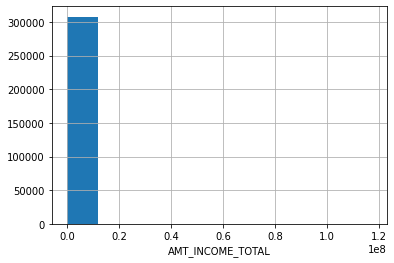

In [9]:
# example
print(app_train['AMT_INCOME_TOTAL'].describe())

app_train['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

Text(0.5, 0, 'AMT_INCOME_TOTAL')

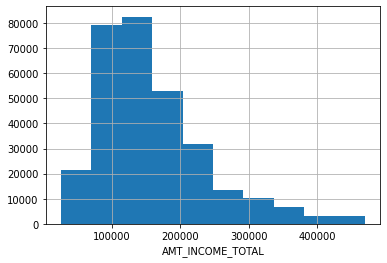

In [10]:
# 注意到該欄位的最大值和 75% 百分位數的值有異常大的差距，所以直接畫直方圖會看不出所以然來，可以先過濾掉再重新畫圖來看
app_train.loc[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

## [ train/test ]

In [11]:
train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## [ dtypes ]

In [12]:
# 秀出資料欄位的類型與數量
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,int64,3
1,float64,2
2,object,5


In [13]:
#確定只有 int64, float64, object 三種類型後, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

3 Integer Features : ['Pclass', 'SibSp', 'Parch']

2 Float Features : ['Age', 'Fare']

5 Object Features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


## [ Request ]

In [14]:
import requests

# 使用 Request 抓取資料
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [15]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [16]:
arrange_data = []
for line in data:
    line = line.split('\t')
    arrange_data.append(line)
    
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## [ Picture ]

In [17]:
from PIL import Image # pip install Pillow
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

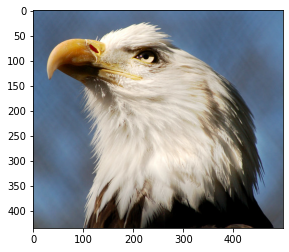

In [18]:
# 讀取上面 data frame 中的前 5 張圖片

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
img = np.array(img)

plt.imshow(img)
plt.show()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x435 at 0x10B59AA90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x322 at 0x118482A90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x11ABD7F50>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x11AA6FD90>
cannot identify image file
Total images that we got: 4 


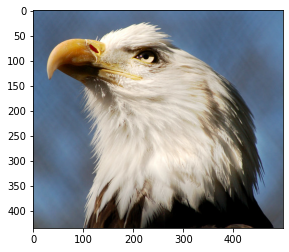

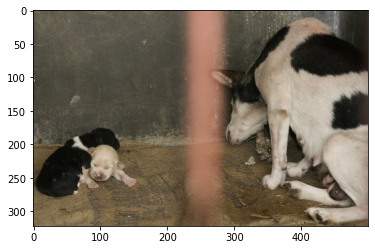

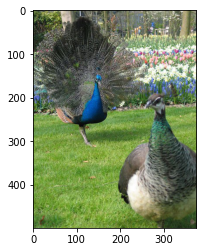

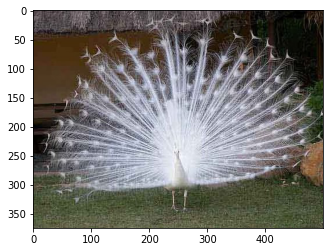

In [19]:
def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for i in url_list:
        response = requests.get(i)
        try:
            img = Image.open(BytesIO(response.content))
            print(img)
            if resize:
                img = img.resize((256,256)) # 困難點：if resize
            img = np.array(img) 
            img_list.append(img)
        except:
            print("cannot identify image file")
            pass
    return img_list

result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

## [ Evaluation Metrics ]
- y：實際值
- yp：預測值

$ MAE = \frac{1}{n}\sum_{i=1}^{n}{|Y_i - \hat{Y}_i|} $  
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

In [20]:
# MAE
def mean_absolute_error(y, yp):
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

In [21]:
# MSE
def mean_squared_error(y, yp):
    mse = MSE = sum((y - yp)**2) / len(y)
    return mse

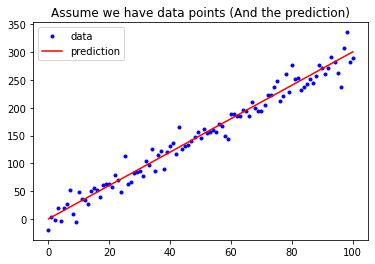

The Mean squared error is 237.345
The Mean absolute error is 11.733


In [22]:
# example
w = 3
b = 0.5
x_lin = np.linspace(0, 100, 101)
y = (x_lin + np.random.randn(101) * 5) * w + b
y_hat = x_lin * w + b

plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

## [ Label Encoding & One Hot Encoding ]

In [23]:
# One Hot Encoding
sub_train = pd.DataFrame(app_train['WEEKDAY_APPR_PROCESS_START'])
print(sub_train.shape)

sub_train = pd.get_dummies(sub_train)
print(sub_train.shape)
sub_train.head()

(307511, 1)
(307511, 7)


,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0


## [ Outliers ]

In [24]:
# 先篩選數值型的欄位
dtype_select = [np.int64, np.float64]
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
numeric_columns

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

In [25]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns: %i" % len(numeric_columns))

Numbers of remain columns: 65


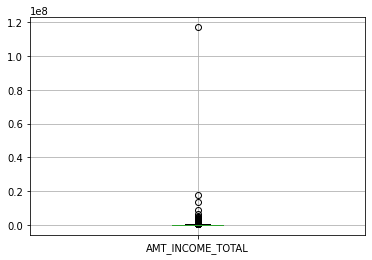

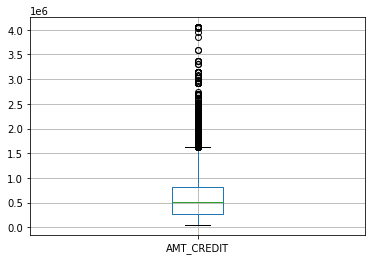

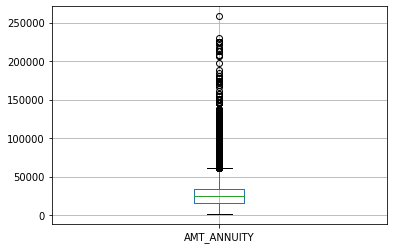

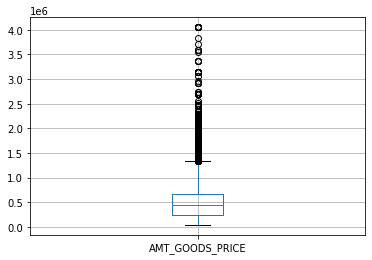

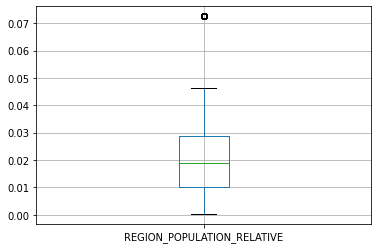

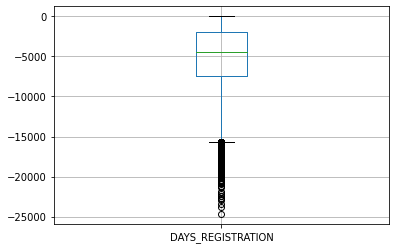

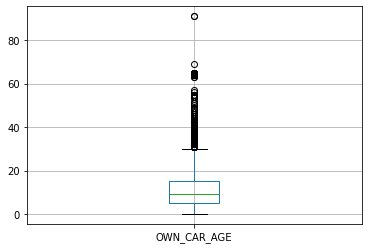

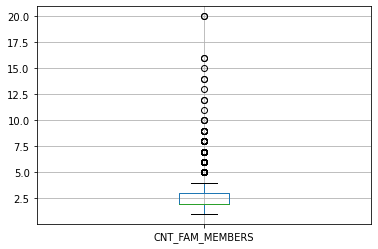

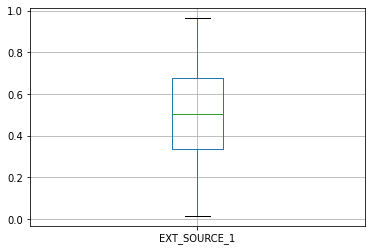

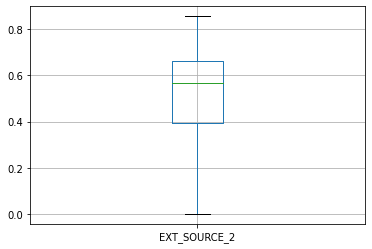

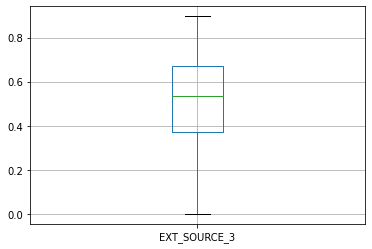

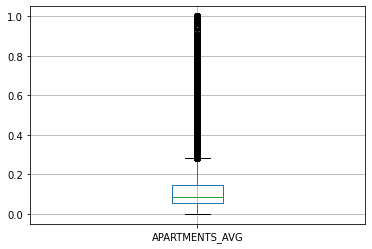

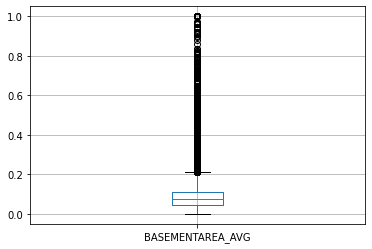

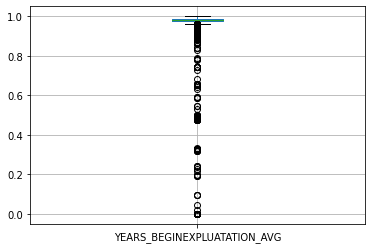

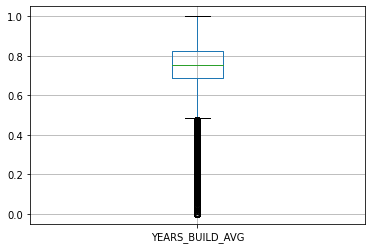

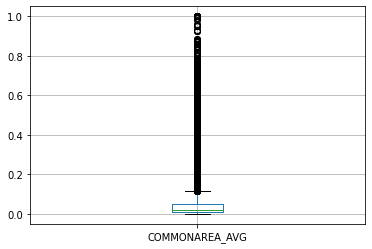

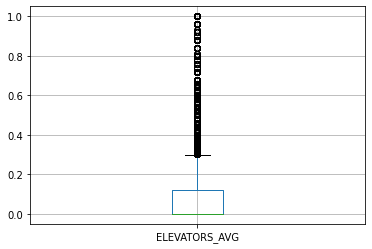

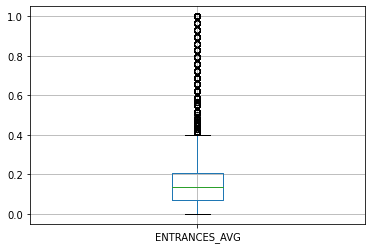

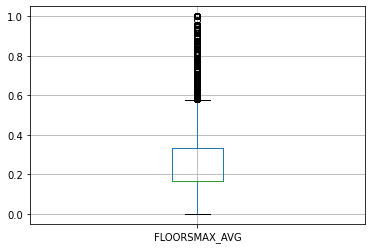

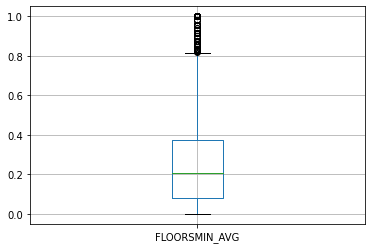

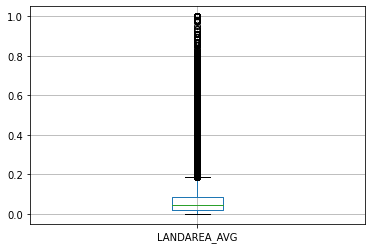

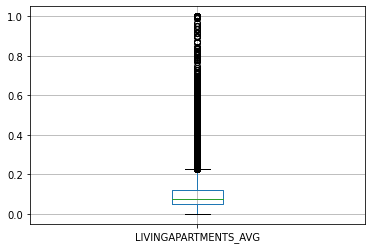

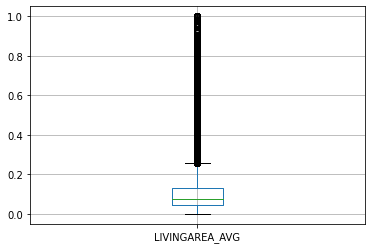

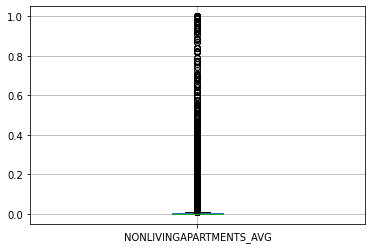

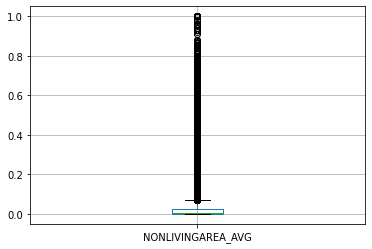

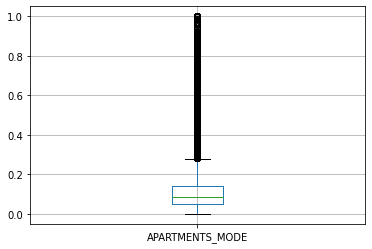

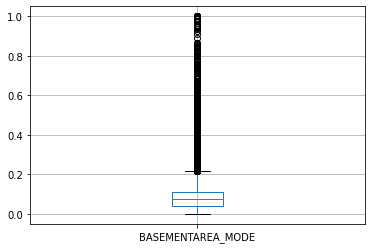

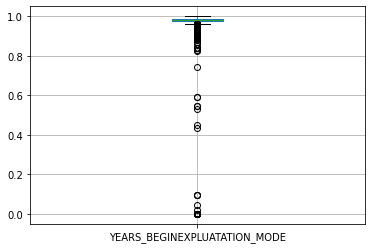

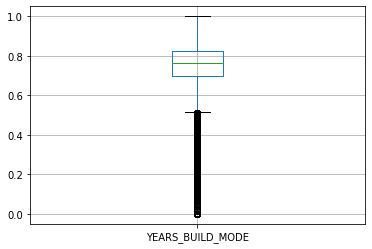

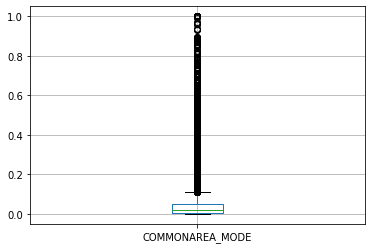

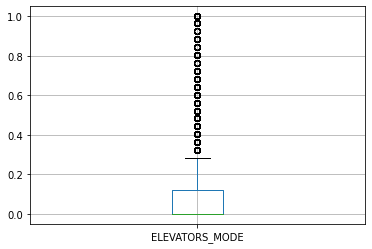

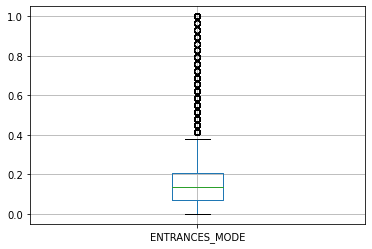

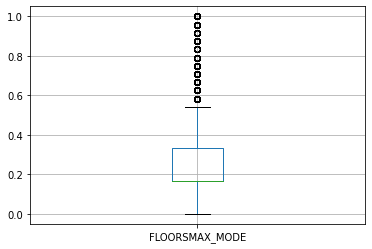

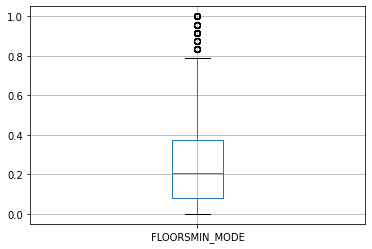

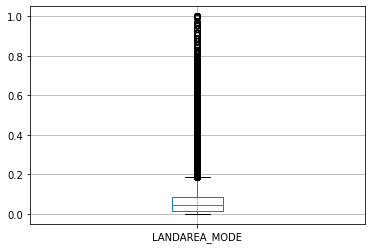

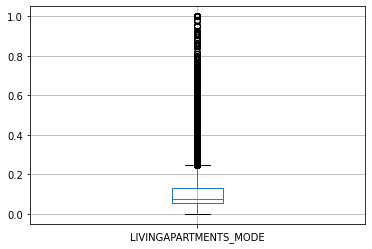

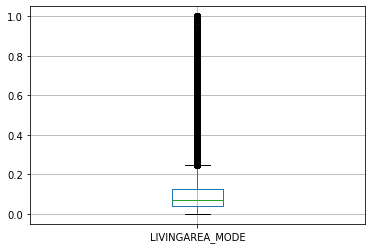

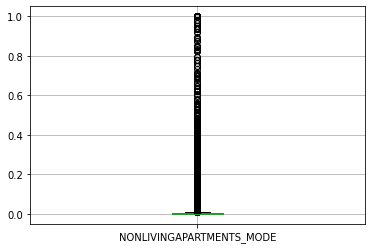

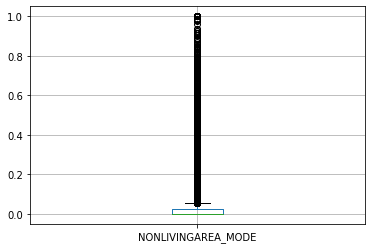

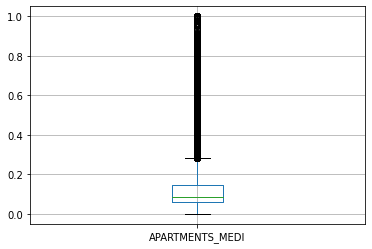

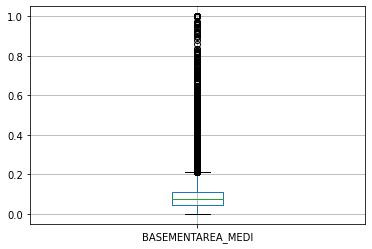

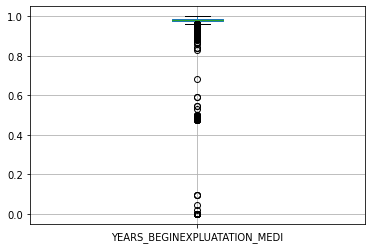

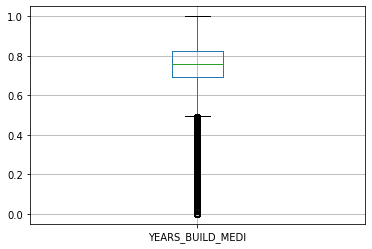

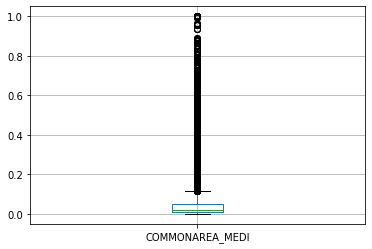

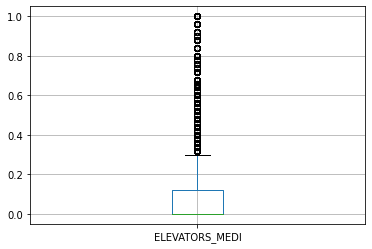

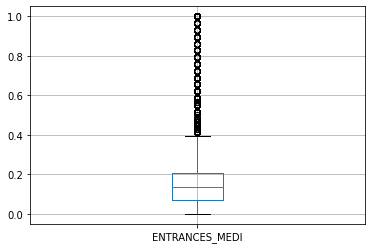

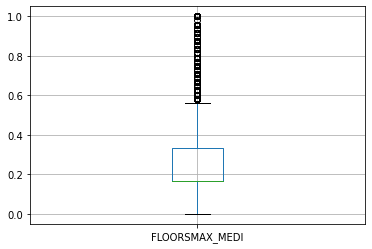

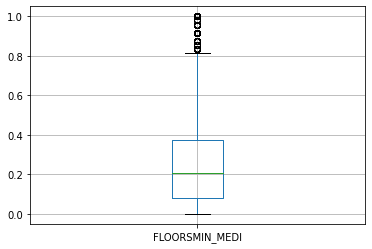

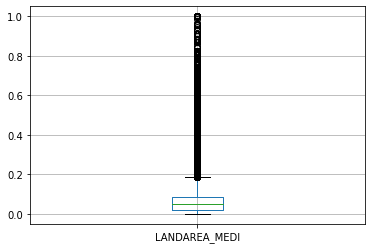

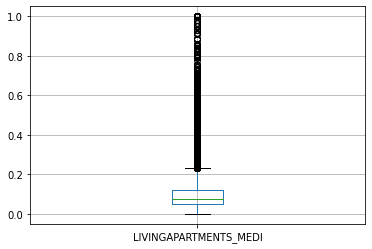

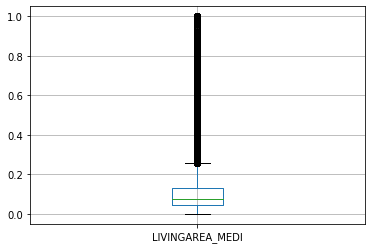

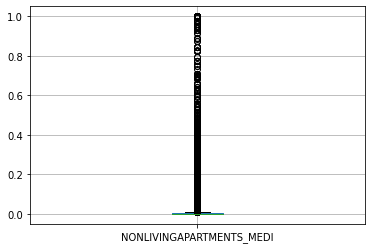

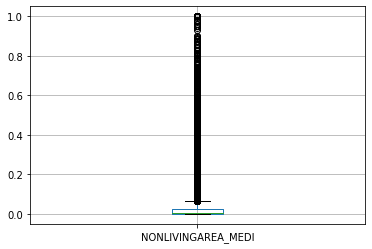

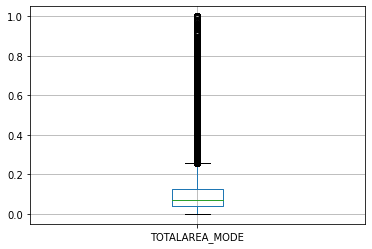

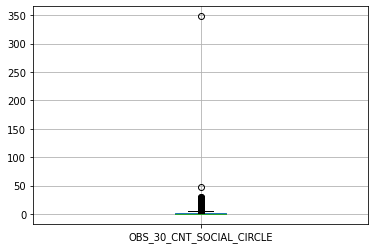

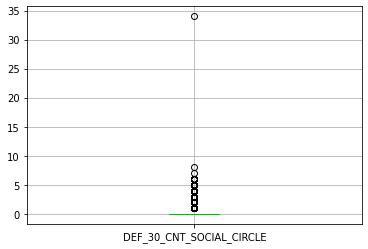

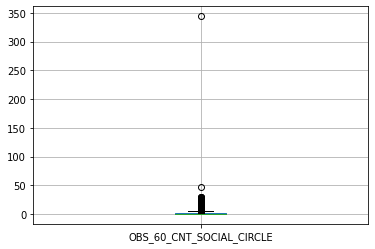

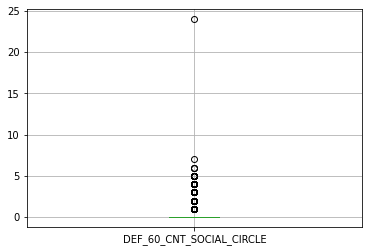

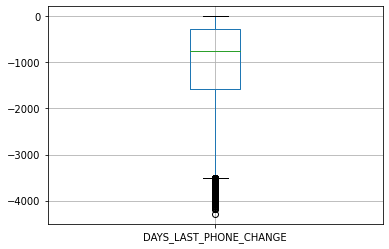

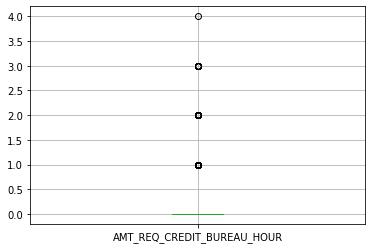

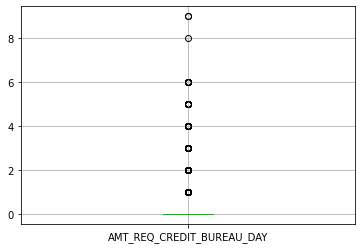

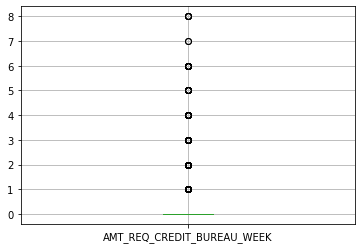

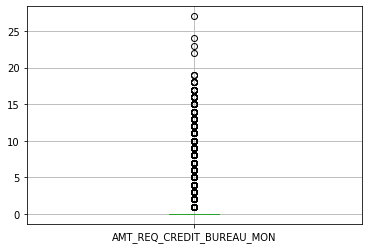

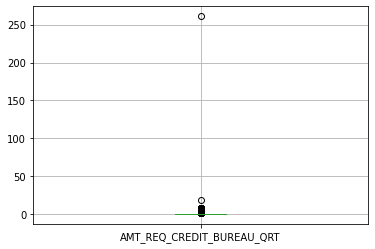

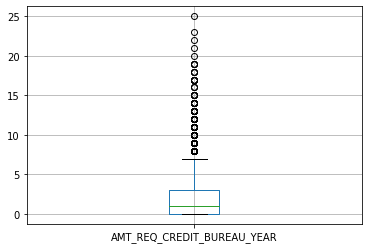

In [26]:
# boxplot
# 檢視這些欄位的數值範圍
for col in numeric_columns:
    app_train.boxplot(col)
    plt.show()

## [ Emprical Cumulative Density Plot ] (ECDP)

In [27]:
# https://github.com/yianfeng21/ML-Marathon-Challenge/blob/master/Chapter_02%20(D005-D021)/Day_009/Day_009_HW.ipynb

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
25650.0             2
26100.0             5
26460.0             6
26550.0             8
27000.0            74
                ...  
6750000.0      307507
9000000.0      307508
13500000.0     307509
18000090.0     307510
117000000.0    307511
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64


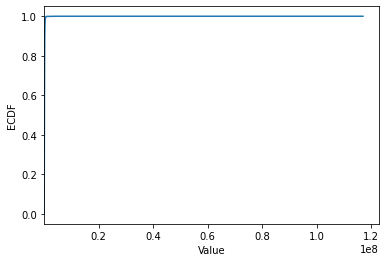

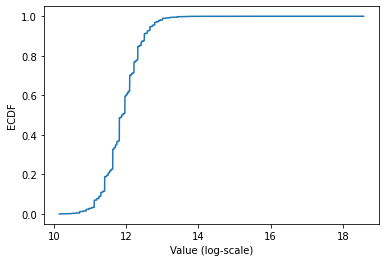

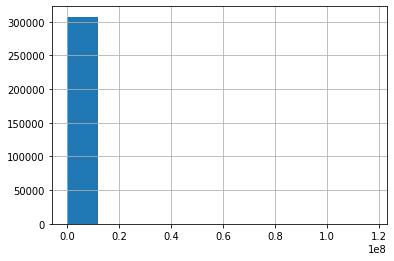

117000000.0     1
18000090.0      1
13500000.0      1
9000000.0       1
6750000.0       1
               ..
27000.0        66
26550.0         2
26460.0         1
26100.0         3
25650.0         2
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64


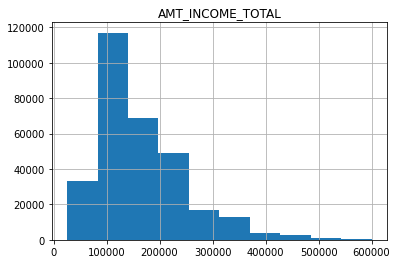

In [28]:
# example (1)
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum() # 累計次數
print(cdf)

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['AMT_INCOME_TOTAL'].hist()
plt.show()

# 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值¶
print(app_train['AMT_INCOME_TOTAL'].value_counts().sort_index(ascending = False))

loc_a = app_train['AMT_INCOME_TOTAL'] < 600000
loc_b = ['AMT_INCOME_TOTAL']

app_train.loc[loc_a, loc_b].hist()
plt.show()

## [ Plot ]